In [1]:
!sudo apt update
!sudo apt install libcairo2-dev \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython==8.21.0

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,384 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,844 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,788 kB]
Hit:13 http://archive.ubuntu.com/ubunt

In [1]:
from manim import *

In [96]:
from manim import *
import pandas as pd
import numpy as np

class ProvincePriceHistogram(Scene):
    def construct(self):
        df = pd.read_csv("HouseListings.csv", encoding='ISO-8859-1')

        # Median prices by province
        province_prices = df.groupby("Province")["Price"].median().sort_values(ascending=False)

        # Abbreviated province names
        province_abbr = {
            "Quebec": "QC", "Ontario": "ON", "Nova Scotia": "NS", "Prince Edward Island": "PE",
            "Newfoundland and Labrador": "NL", "New Brunswick": "NB", "British Columbia": "BC",
            "Alberta": "AB", "Manitoba": "MB", "Saskatchewan": "SK", "Northwest Territories": "NT",
            "Yukon": "YT", "Nunavut": "NU"
        }

        provinces = [province_abbr.get(p, p) for p in province_prices.index]
        prices = list(province_prices.values)

        # Chart config
        bar_width = 0.6
        spacing = 1.1
        max_height = 4.5
        y_max = 1_000_000
        norm = lambda p: (p - 0) / y_max
        price_colors = [interpolate_color(BLUE, RED, norm(p)) for p in prices]

        bars = VGroup()
        province_labels = VGroup()
        price_labels = VGroup()

        for i, (province, price) in enumerate(zip(provinces, prices)):
            price_height = (price / y_max) * max_height
            x_pos = i * spacing - (len(provinces) * spacing) / 2

            # Bar
            price_bar = Rectangle(width=bar_width, height=price_height,
                                  fill_color=price_colors[i], fill_opacity=1,
                                  stroke_color=BLACK, stroke_width=0.8)
            price_bar.move_to([x_pos, price_height / 2 - 2, 0])
            bars.add(price_bar)

            # Province label
            province_label = Text(province, font_size=25, color=BLACK).scale(0.3)
            province_label.next_to(price_bar, DOWN, buff=0.15)
            province_labels.add(province_label)

            # Price label on top of bar
            price_label = Text(f"${int(price):,} CAD", font_size=24, color=BLACK).scale(0.3)
            price_label.next_to(price_bar, UP, buff=0.1)
            price_labels.add(price_label)

        # Grid lines and y-axis labels
        y_axis_lines = VGroup()
        y_axis_labels = VGroup()
        for val in range(0, y_max + 1, 100_000):
            h = (val / y_max) * max_height - 2
            x_start = bars[0].get_left()[0] - 0.3
            x_end = bars[-1].get_right()[0] + 0.3
            line = DashedLine(start=[x_start, h, 0], end=[x_end, h, 0],
                              dash_length=0.1, color=GRAY, stroke_opacity=0.2)
            label = Text(f"${val // 1000}k", font_size=24, color=BLACK).scale(0.3)
            label.next_to(line, LEFT, buff=0.05)
            y_axis_lines.add(line)
            y_axis_labels.add(label)

        # Y Axis Title
        y_axis_title = Text("Price (CAD)", font_size=28, color=BLACK).scale(0.35)
        y_axis_title.rotate(PI / 2)
        y_axis_title.next_to(y_axis_labels, LEFT, buff=0.2)

        # X Axis Title
        x_axis_title = Text("Province", font_size=28, color=BLACK).scale(0.35)
        x_axis_title.next_to(province_labels, DOWN, buff=0.15)

        # Background
        bg = Rectangle(width=14, height=8, fill_color=WHITE, fill_opacity=1).to_edge(DOWN)

        # Title
        title = Text("Median House Prices by Province", font_size=30, color=BLACK)
        title.to_edge(UP)
        subtitle = Text("Prices shown in CAD (Canadian Dollars)", font_size=22, color=BLACK).scale(0.5)
        subtitle.next_to(title, DOWN, buff=0.15)

        self.add(
            bg, y_axis_lines, y_axis_labels, y_axis_title,
            bars, province_labels, price_labels,
            x_axis_title, title, subtitle
        )


Manim Community v0.19.0

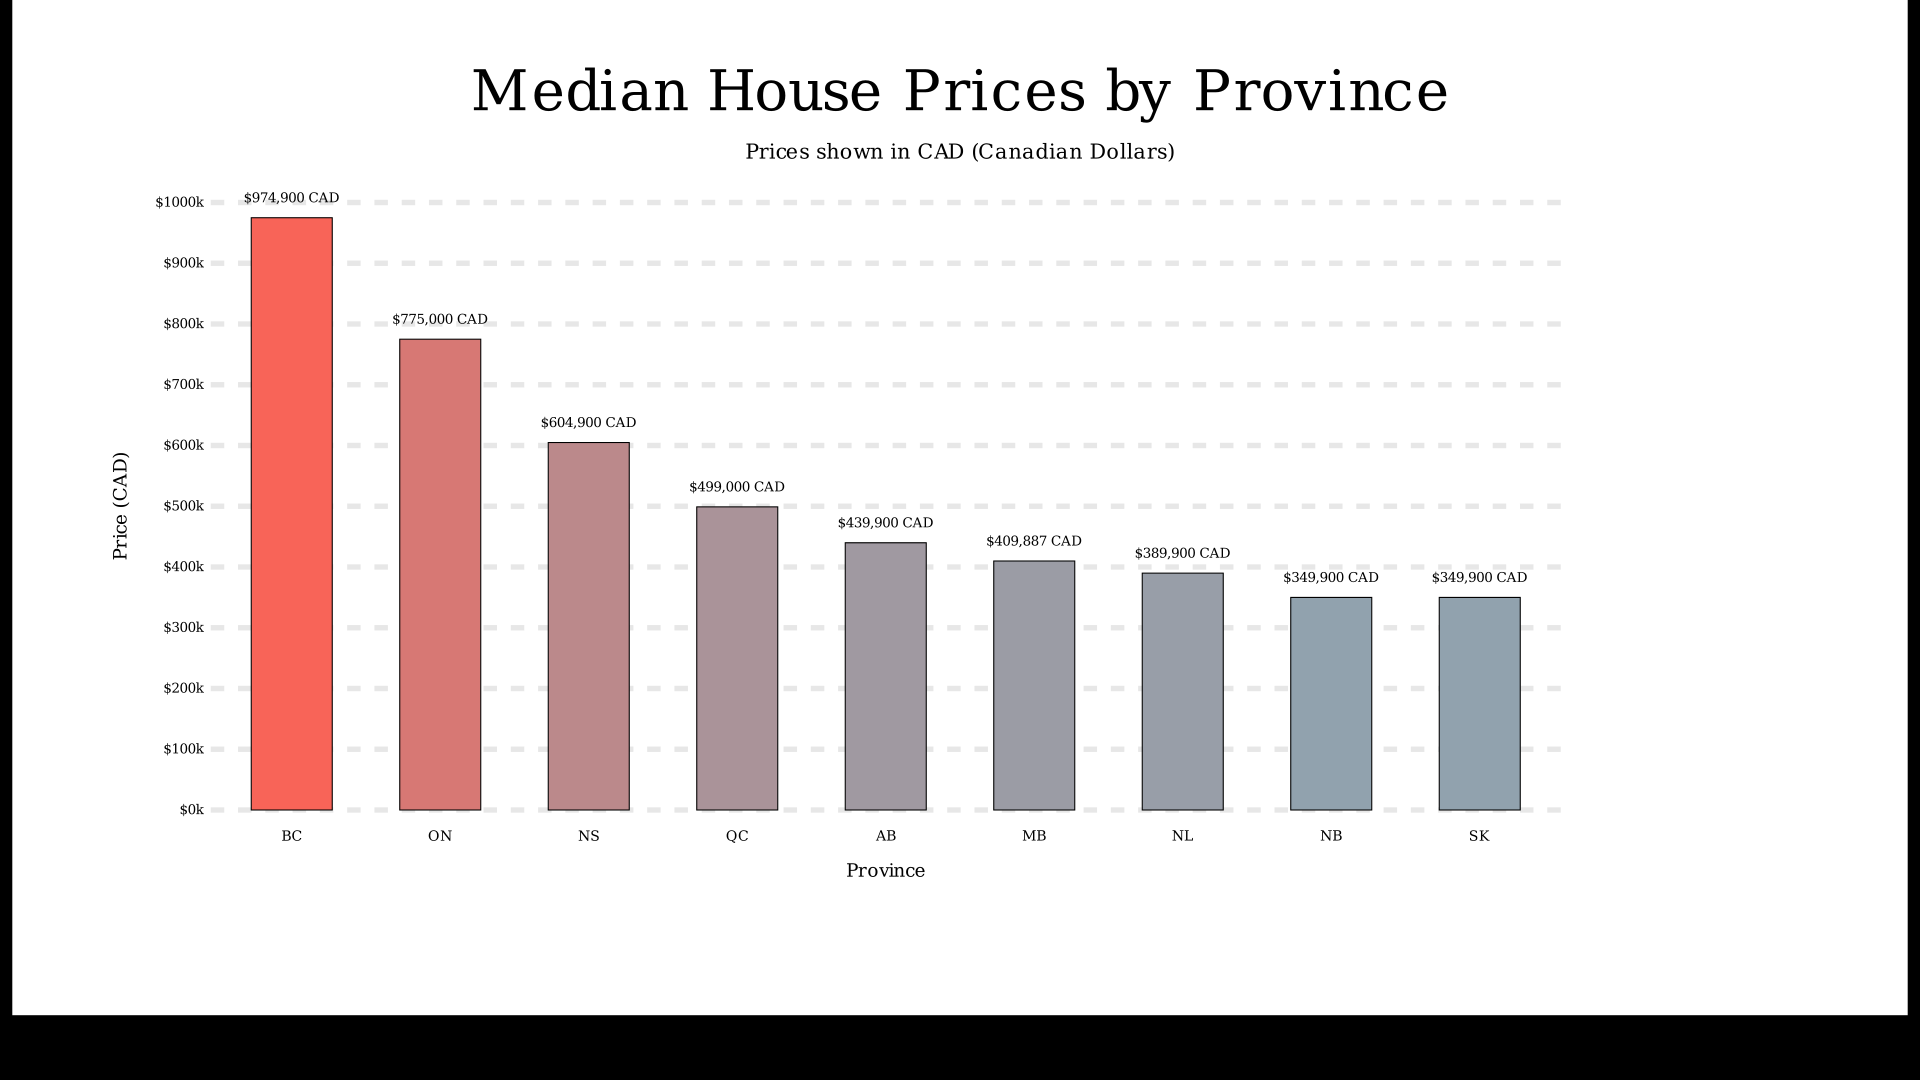

In [97]:
%manim -s -v WARNING ProvincePriceHistogram
